## <span style="color:purple">**Exercise**</span>
Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,
1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

- 0 Setosa
- 1 Versicolour
- 2 Virginica

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names[[0,1,2]]

'virginica'

# Training a Logistic Regression Model on Iris dataset

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='newton-cg', max_iter=10000)

In [11]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='newton-cg')

In [12]:
# Predict on test data
y_pred=model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

# Measure the accuracy of the model

In [13]:
model.score(X_train,y_train)

0.9619047619047619

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00


### Map Numeric Predictions to Flower Names
The target values (iris.target) are integers (0, 1, 2), corresponding to the flower names. Use iris.target_names to map them:

In [15]:
# Map predictions to flower names
predicted_flower_names=[iris.target_names[label] for label in y_pred]

# print the output 
print(predicted_flower_names)

['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa']


### Predict Flowers for Specific Samples
To predict the species of specific samples from the test set (or new samples):

In [16]:
# Predict for specific samples (e.g., first 5 samples in X_test)
samples=X_test[0:5]
sample_predictions=model.predict(samples)

# Map to flower names
sample_flower_names= [iris.target_names[label] for label in sample_predictions]

print("Predictions for the Samples")
for i, flower in enumerate(sample_flower_names):
    print(f" sample {i+1}: {flower}")



Predictions for the Samples
 sample 1: versicolor
 sample 2: setosa
 sample 3: virginica
 sample 4: versicolor
 sample 5: versicolor


## Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Text(50.722222222222214, 0.5, 'Actual')

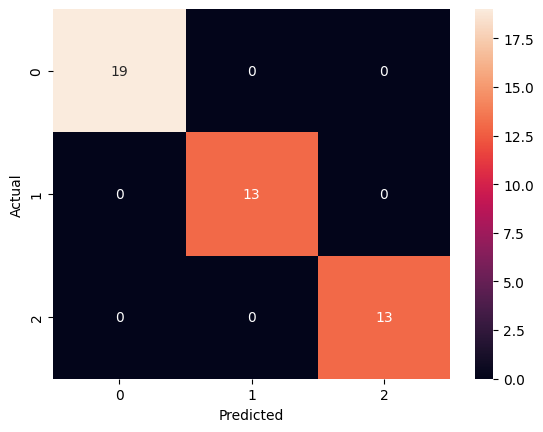

In [18]:
import seaborn as sns 
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [19]:
import joblib
filepath=r"F:\Machine Learning all Algorithms\7 Logistic Regression\Multiclass Classification\Iris_predictor.pkl"
joblib.dump(model, filepath)

['F:\\Machine Learning all Algorithms\\7 Logistic Regression\\Multiclass Classification\\Iris_predictor.pkl']

In [21]:
import pickle


In [22]:
filepath=r"F:\Machine Learning all Algorithms\7 Logistic Regression\Multiclass Classification\Iris_predictor.pkl"
with open(filepath, 'wb') as f:
    pickle.dump(model, f)

In [23]:
with open(filepath, 'rb') as f:
    Iris=pickle.load(f)

In [24]:
Iris.predict(samples)

array([1, 0, 2, 1, 1])